# **Data Pre-Processing Home Credit Indonesia**

## Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization
import matplotlib.dates as mdates
import plotly.express as px         
from sklearn import cluster
from sklearn.cluster import KMeans 
import matplotlib.cm as cm
from sklearn.datasets import make_blobs  
from sklearn.metrics import silhouette_samples, silhouette_score  
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  # default='warn'
from yellowbrick.cluster import SilhouetteVisualizer
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max.columns',None) 

## Import Dataset

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/17pMTMh1vfADy6tLnTZmnmGsfJnS1QP6x/view'
import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('application_train.csv')

application_train = pd.read_csv('application_train.csv')
print(application_train)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [ ]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
application_train.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Handling Missing Value

In [ ]:
df = application_train.copy()

In [ ]:
# Check null values
total_null = df.isnull().sum()
percent_missing = df.isnull().sum() * 100/ len(df)
dtypes = [df[col].dtype for col in df.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()
missing_value

index  total_null data_type  percent_missing
0            COMMONAREA_MEDI      214865   float64            69.87
1             COMMONAREA_AVG      214865   float64            69.87
2            COMMONAREA_MODE      214865   float64            69.87
3   NONLIVINGAPARTMENTS_MODE      213514   float64            69.43
4    NONLIVINGAPARTMENTS_AVG      213514   float64            69.43
..                       ...         ...       ...              ...
62              EXT_SOURCE_2         660   float64             0.21
63           AMT_GOODS_PRICE         278   float64             0.09
64               AMT_ANNUITY          12   float64             0.00
65           CNT_FAM_MEMBERS           2   float64             0.00
66    DAYS_LAST_PHONE_CHANGE           1   float64             0.00

[67 rows x 4 columns]

In [ ]:
# Drop feature that have more than 35% missing value
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 35].index.tolist()

In [ ]:
# Create Function to remove feature that have more than 35% missing value
def col_full_null(df):
    list_drop_col = ['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI',
                     'FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI',
                     'YEARS_BUILD_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG','BASEMENTAREA_MEDI',
                     'BASEMENTAREA_AVG','BASEMENTAREA_MODE','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG',
                     'ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG',
                     'LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
                     'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE']
    df.drop(columns=list_drop_col, inplace = True)

In [ ]:
col_full_null(df)

## Exploratory Data Analysis

In [ ]:
df_eda = df.copy()

In [ ]:
num = df_eda.select_dtypes(include='number').columns
cat = df_eda.select_dtypes(include='object').columns

## Univariate Analysis


<ipython-input-100-dd3a3b418b00>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[col], palette='viridis', shade=True, ax=axes[i])
<ipython-input-100-dd3a3b418b00>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df[col], palette='viridis', shade=True, ax=axes[i])
<ipython-input-100-dd3a3b418b00>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[col], palette='viridis', shade=True, ax=axes[i])
<ipython-input-100-dd3a3b418b00>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df[col], palette='viridis', shade=True, ax=axes[i])
<ipython-input-100-dd3a3b418b00>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

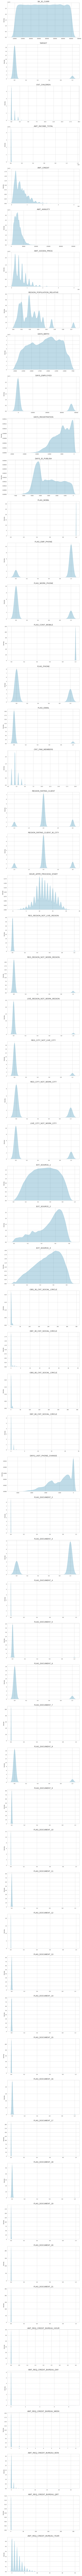

In [ ]:
# Select numerical columns for analysis
num_cols = df.select_dtypes(include=['float', 'int']).columns

# Set figure size and create subplots
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 5 * len(num_cols)))

# Plot KDE for each numerical column
for i, col in enumerate(num_cols):
    sns.kdeplot(x=df[col], palette='viridis', shade=True, ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel(' ')
    fig.tight_layout()
    
plt.show()

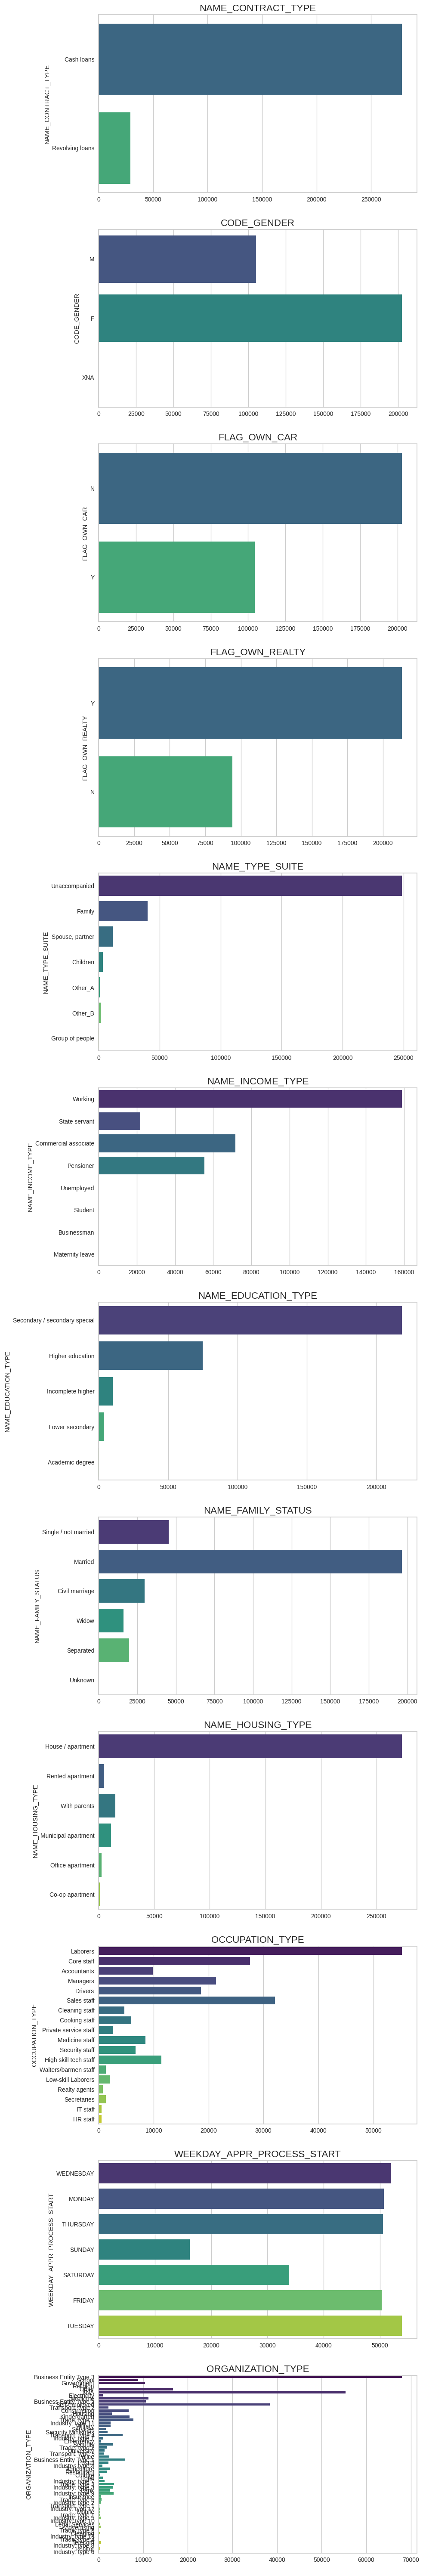

In [ ]:
# Select categorical columns for analysis
cat_cols = df.select_dtypes(include=['object']).columns

# Set figure size and create subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 5 * len(cat_cols)))

# Plot countplot for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(y=df[col], orient='h', palette='viridis', ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel(' ')
    fig.tight_layout()
    
plt.show()

## Bivariate Analysis

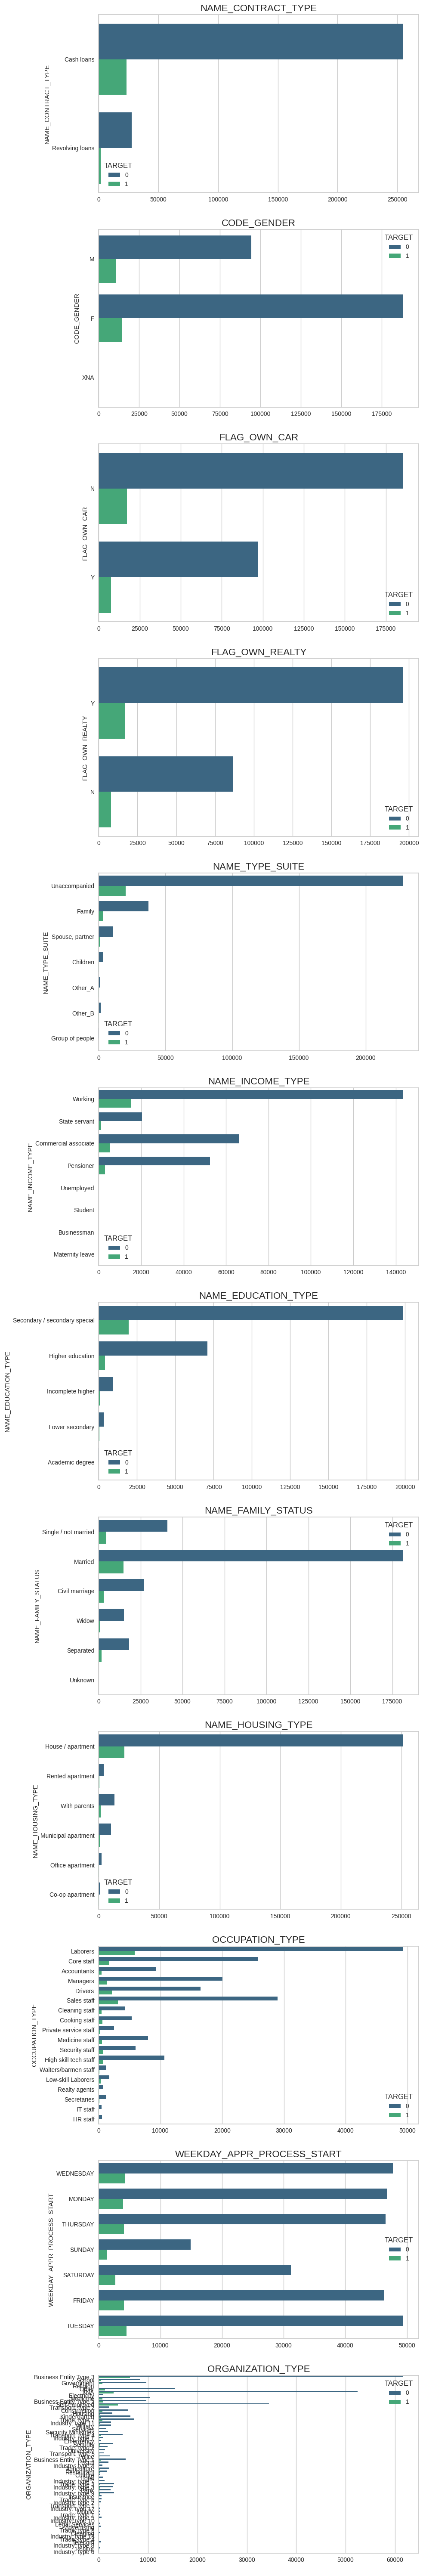

In [ ]:
# Select categorical columns for analysis
cat_cols = df.select_dtypes(include=['object']).columns

# Set figure size and create subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 5 * len(cat_cols)))

# Plot countplot for each categorical column with respect to the target variable
for i, col in enumerate(cat_cols):
    sns.countplot(y=df[col], hue=df['TARGET'], palette='viridis', ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel(' ')
    fig.tight_layout()
    
plt.show()

<ipython-input-103-10daf0678396>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_eda.corr(), annot=True, fmt='.2f', cmap=color_palette)


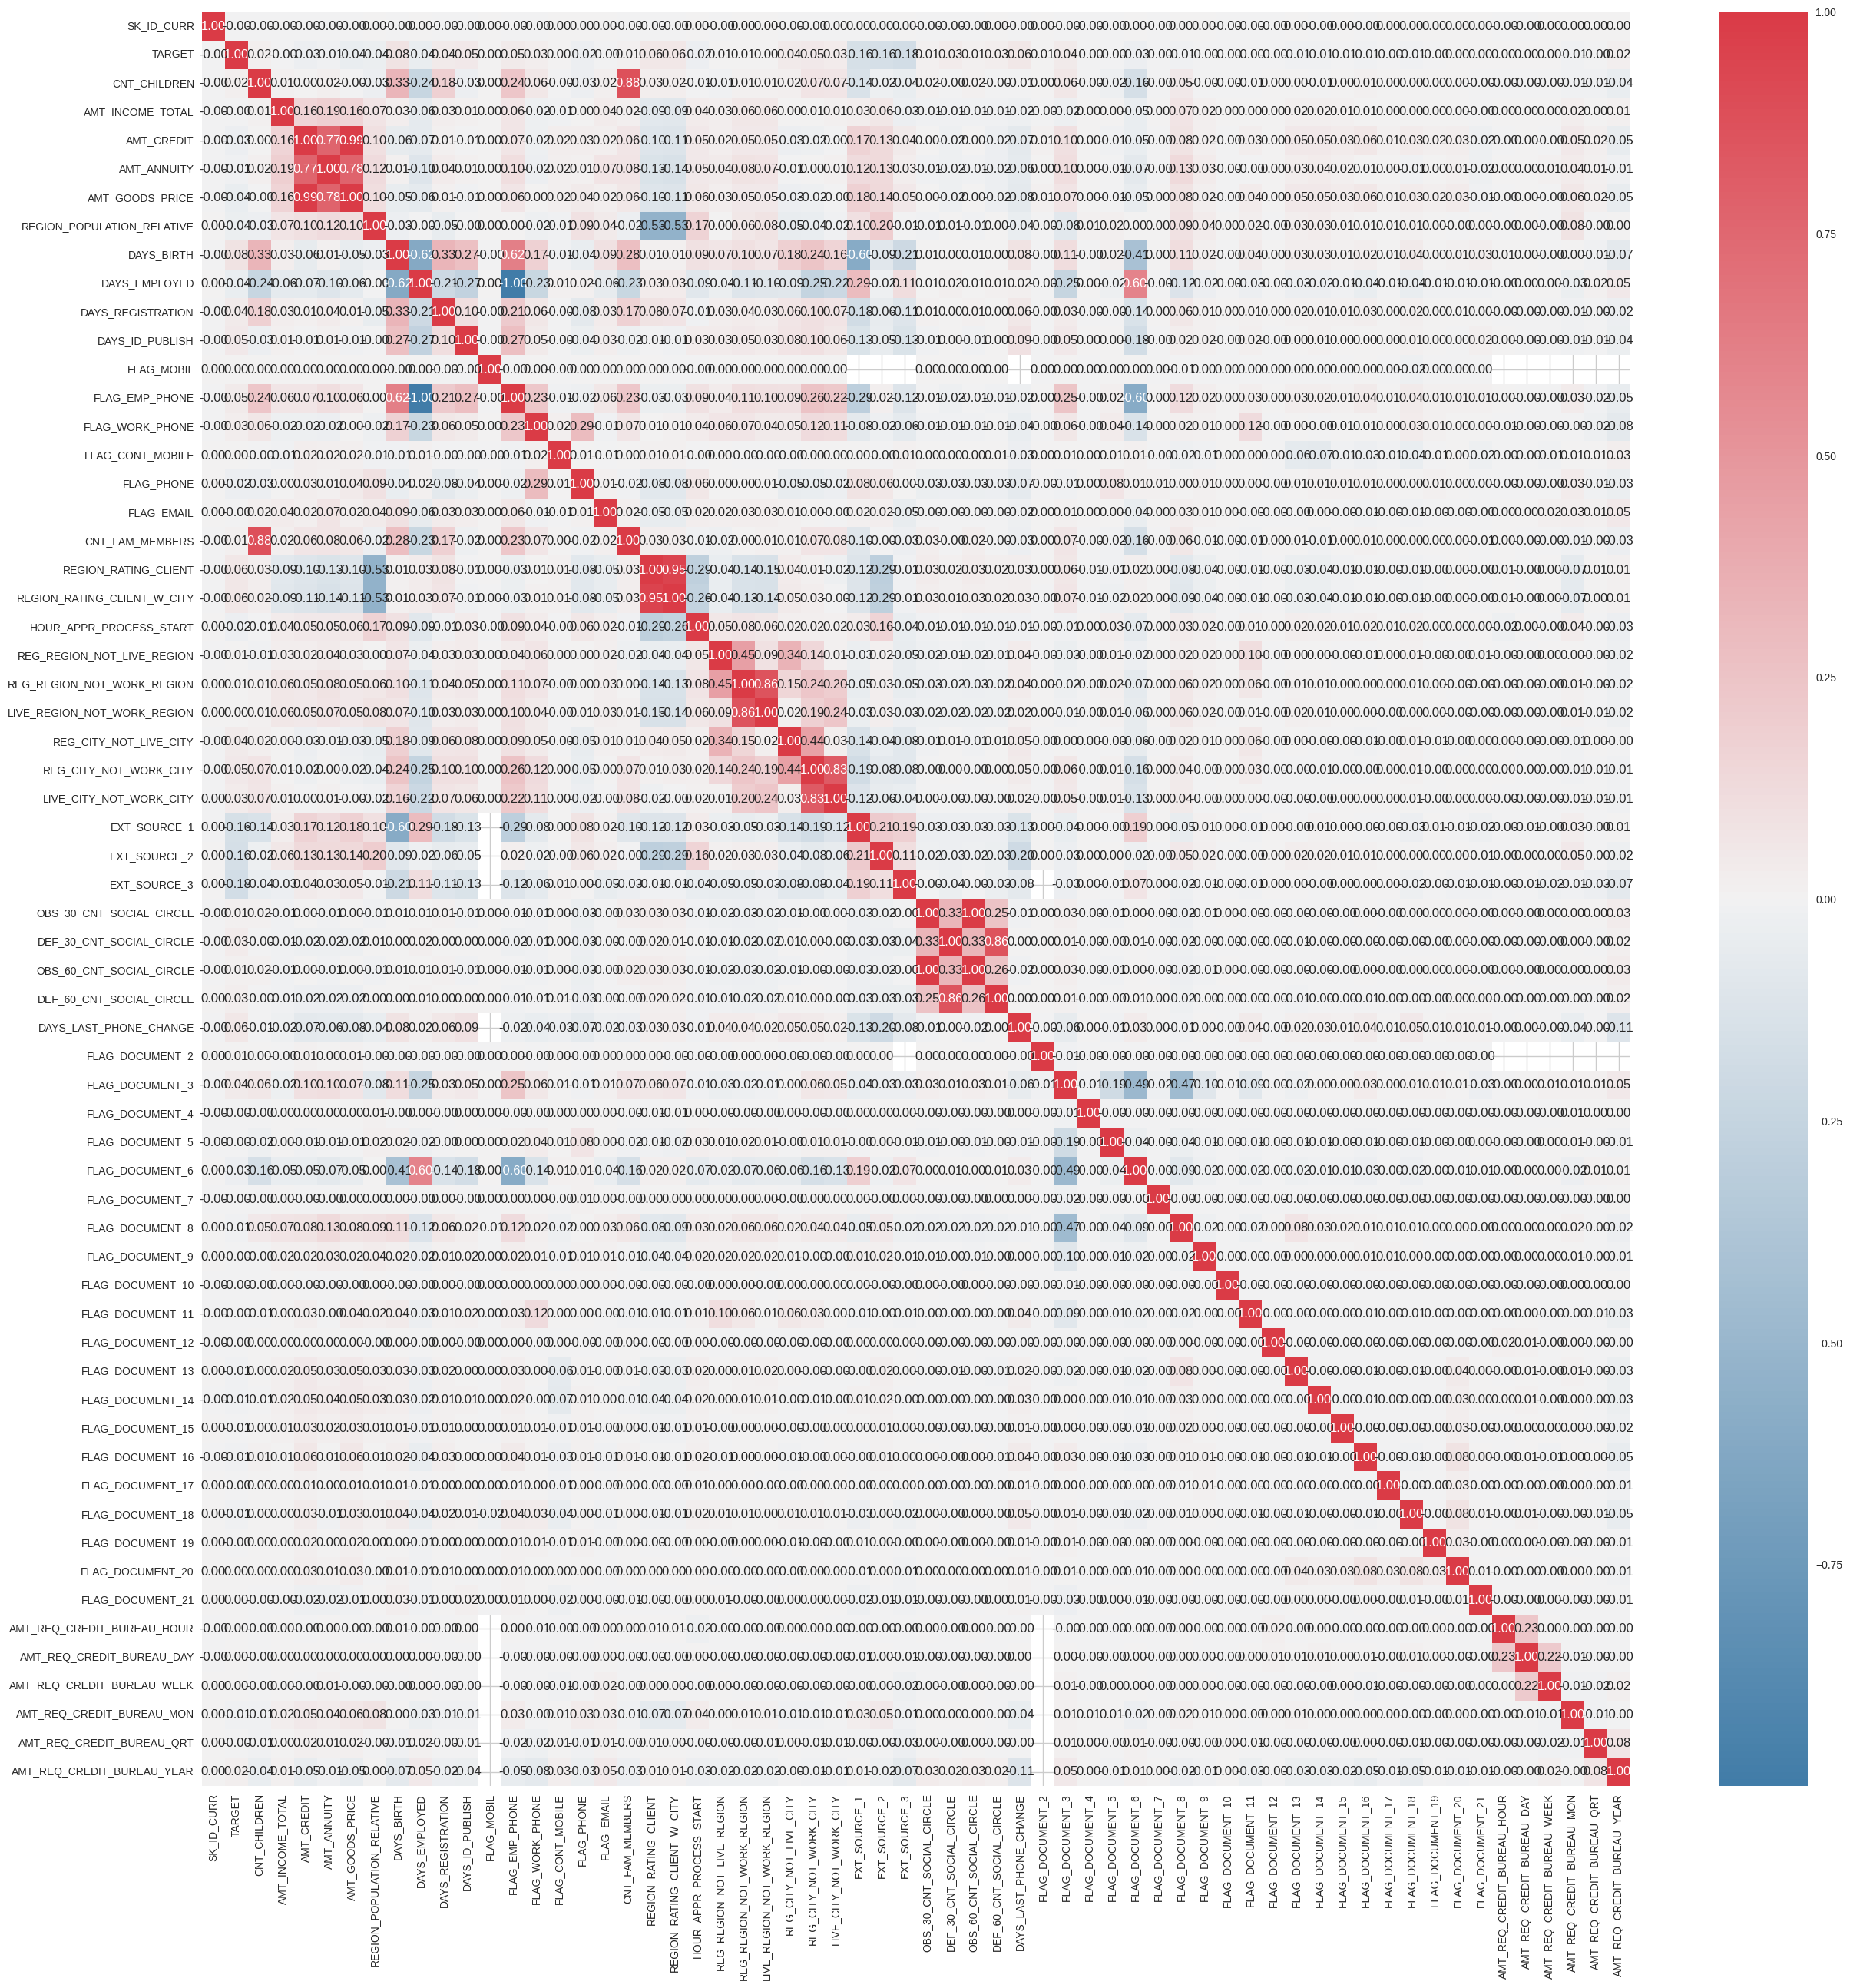

In [ ]:
# Set the color palette for the heatmap
color_palette = sns.diverging_palette(240, 10, as_cmap=True)

# Create a correlation heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_eda.corr(), annot=True, fmt='.2f', cmap=color_palette)
plt.show()

## Preprocessing

In [ ]:
df_preprocessing = df_eda.copy()

In [ ]:
def preprocessing(df):
    # List drop feature because have high cardinality,high correlation,unnecesarry for credit risk,and majority on 0 value
    list_drop = ['ORGANIZATION_TYPE','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_MOBIL','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON' ,'AMT_REQ_CREDIT_BUREAU_QRT',
                 'WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION']
    df.drop(columns=list_drop, inplace = True)
    
    # Fill Numeric Null Value
    list_num = ['AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_GOODS_PRICE']
    for num in list_num:
        df[num] = df[num].fillna(df[num].median())
        
    # EXT_SORUCE   
    list_ext = ['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']
    for ext in list_ext:
        df[ext] = df[ext].fillna(0)
    
    #Fill Category Null Value
    list_cat = ['NAME_TYPE_SUITE']
    for cat in list_cat:
        df[cat] = df[cat].fillna(df[cat].mode()[0])
    df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Other')

  # Create new feature
    df['AGE'] = round((df['DAYS_BIRTH'].abs()/365),0)
    df['EMP_LENGTH'] = round((df['DAYS_EMPLOYED'].abs()/365),0)
    df['REGIST_LENGTH'] = round((df['DAYS_REGISTRATION'].abs()/365),0)
    df['PUBLISH_LENGTH'] = round((df['DAYS_ID_PUBLISH'].abs()/365),0)
    df['PHONE_CHANGE_LENGTH'] = round((df['DAYS_LAST_PHONE_CHANGE'].abs()/365),0)
    list_new_feature = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
    df.drop(columns= list_new_feature, inplace = True)
    
    # Replace other to non dominant values in categorical
    df['NAME_TYPE_SUITE'].replace(to_replace = ['Other_B','Other_A','Group of people'], value = 'Other', inplace = True)
    df['NAME_INCOME_TYPE'].replace(to_replace = ['Unemployed','Student','Businessman','Maternity leave'], value = 'Other', inplace = True)
    df['NAME_FAMILY_STATUS'].replace(to_replace = ['Civil marriage','Unknown'], value = 'Married', inplace = True)
    df['NAME_HOUSING_TYPE'].replace(to_replace = ['Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], value = 'Other', inplace = True)
    
    # Occupation Type
    office = ['IT staff','HR staff','Secretaries','Accountants','High skill tech staff','Managers','Sales staff','Core staff','Realty agents']
    service = ['Waiters/barmen staff','Private service staff','Cleaning staff','Cooking staff','Security staff','Medicine staff','Drivers']
    labour = ['Low-skill Laborers','Laborers']
    df['OCCUPATION_TYPE'].replace(to_replace = office, value = 'Office Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = service, value = 'Service Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = labour, value = 'Labour Job', inplace = True)
    
    # Adjuctic value to numeric
    # NAME_CONTRACT_TYPE (1 = Cash loans, 0 = Revolving loans)
    df['NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE']=='Cash loans',1,0)
    # CODE GENDER (1 = M, 0 = F)
    df['CODE_GENDER'] = np.where(df['CODE_GENDER']=='M',1,0)
    # FLAG_OWN_CAR (Y = 1, N = 0)
    df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='Y',1,0)
    # FLAG_OWN_REALTY (Y = 1, N = 0)
    df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='Y',1,0)

 # Drop Row that contain XNA in code gender
    df = df.drop(df[df['CODE_GENDER'] == 'XNA'].index,inplace = True)

In [ ]:
preprocessing(df_preprocessing)

In [ ]:
df_preprocessing.describe().T

count      mean       std       min       25%  \
SK_ID_CURR                  307511.00 278180.52 102790.18 100002.00 189145.50   
TARGET                      307511.00      0.08      0.27      0.00      0.00   
NAME_CONTRACT_TYPE          307511.00      0.90      0.29      0.00      1.00   
CODE_GENDER                 307511.00      0.34      0.47      0.00      0.00   
FLAG_OWN_CAR                307511.00      0.34      0.47      0.00      0.00   
FLAG_OWN_REALTY             307511.00      0.69      0.46      0.00      0.00   
CNT_CHILDREN                307511.00      0.42      0.72      0.00      0.00   
AMT_INCOME_TOTAL            307511.00 168797.92 237123.15  25650.00 112500.00   
AMT_CREDIT                  307511.00 599026.00 402490.78  45000.00 270000.00   
AMT_ANNUITY                 307511.00  27108.49  14493.46   1615.50  16524.00   
AMT_GOODS_PRICE             307511.00 538316.29 369288.98  40500.00 238500.00   
REGION_POPULATION_RELATIVE  307511.00      0.02      0.01      0.00      0.01   
FLAG_WORK_PHONE             307511.00      0.20      0.40      0.00      0.00   
FLAG_PHONE                  307511.00      0.28      0.45      0.00      0.00   
FLAG_EMAIL                  307511.00      0.06      0.23      0.00      0.00   
CNT_FAM_MEMBERS             307511.00      2.15      0.91      1.00      2.00   
REGION_RATING_CLIENT        307511.00      2.05      0.51      1.00      2.00   
HOUR_APPR_PROCESS_START     307511.00     12.06      3.27      0.00     10.00   
LIVE_REGION_NOT_WORK_REGION 307511.00      0.04      0.20      0.00      0.00   
REG_CITY_NOT_LIVE_CITY      307511.00      0.08      0.27      0.00      0.00   
REG_CITY_NOT_WORK_CITY      307511.00      0.23      0.42      0.00      0.00   
EXT_SOURCE_1                307511.00      0.22      0.29      0.00      0.00   
EXT_SOURCE_2                307511.00      0.51      0.19      0.00      0.39   
EXT_SOURCE_3                307511.00      0.41      0.27      0.00      0.18   
AMT_REQ_CREDIT_BUREAU_YEAR  307511.00      1.78      1.77      0.00      1.00   
AGE                         307511.00     43.94     11.96     21.00     34.00   
EMP_LENGTH                  307511.00    185.61    382.17      0.00      3.00   
REGIST_LENGTH               307511.00     13.66      9.66      0.00      6.00   
PUBLISH_LENGTH              307511.00      8.20      4.15      0.00      5.00   
PHONE_CHANGE_LENGTH         307511.00      2.63      2.28      0.00      1.00   

                                  50%       75%          max  
SK_ID_CURR                  278202.00 367142.50    456255.00  
TARGET                           0.00      0.00         1.00  
NAME_CONTRACT_TYPE               1.00      1.00         1.00  
CODE_GENDER                      0.00      1.00         1.00  
FLAG_OWN_CAR                     0.00      1.00         1.00  
FLAG_OWN_REALTY                  1.00      1.00         1.00  
CNT_CHILDREN                     0.00      1.00        19.00  
AMT_INCOME_TOTAL            147150.00 202500.00 117000000.00  
AMT_CREDIT                  513531.00 808650.00   4050000.00  
AMT_ANNUITY                  24903.00  34596.00    258025.50  
AMT_GOODS_PRICE             450000.00 679500.00   4050000.00  
REGION_POPULATION_RELATIVE       0.02      0.03         0.07  
FLAG_WORK_PHONE                  0.00      0.00         1.00  
FLAG_PHONE                       0.00      1.00         1.00  
FLAG_EMAIL                       0.00      0.00         1.00  
CNT_FAM_MEMBERS                  2.00      3.00        20.00  
REGION_RATING_CLIENT             2.00      2.00         3.00  
HOUR_APPR_PROCESS_START         12.00     14.00        23.00  
LIVE_REGION_NOT_WORK_REGION      0.00      0.00         1.00  
REG_CITY_NOT_LIVE_CITY           0.00      0.00         1.00  
REG_CITY_NOT_WORK_CITY           0.00      0.00         1.00  
EXT_SOURCE_1                     0.00      0.46         0.96  
EXT_SOURCE_2                     0.57      0.66         0.85  
EXT_SOUR

In [ ]:
# Error value from EMP_LENGTH, we will drop
df_preprocessing = df_preprocessing[df_preprocessing['EMP_LENGTH'] <=100]

## Univariate Analysis After Proccesing



In [ ]:
num = df_preprocessing.select_dtypes(include='number').columns
cat = df_preprocessing.select_dtypes(include='object').columns

In [ ]:
print(len(num))
print(len(cat))

30
6


<ipython-input-111-56ca3dd9fb07>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_preprocessing[num[i]], palette='viridis', shade=True)
<ipython-input-111-56ca3dd9fb07>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df_preprocessing[num[i]], palette='viridis', shade=True)
<ipython-input-111-56ca3dd9fb07>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_preprocessing[num[i]], palette='viridis', shade=True)
<ipython-input-111-56ca3dd9fb07>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df_preprocessing[num[i]], palette='viridis', shade=True)
<ipython-input-111-56ca3dd9fb07>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

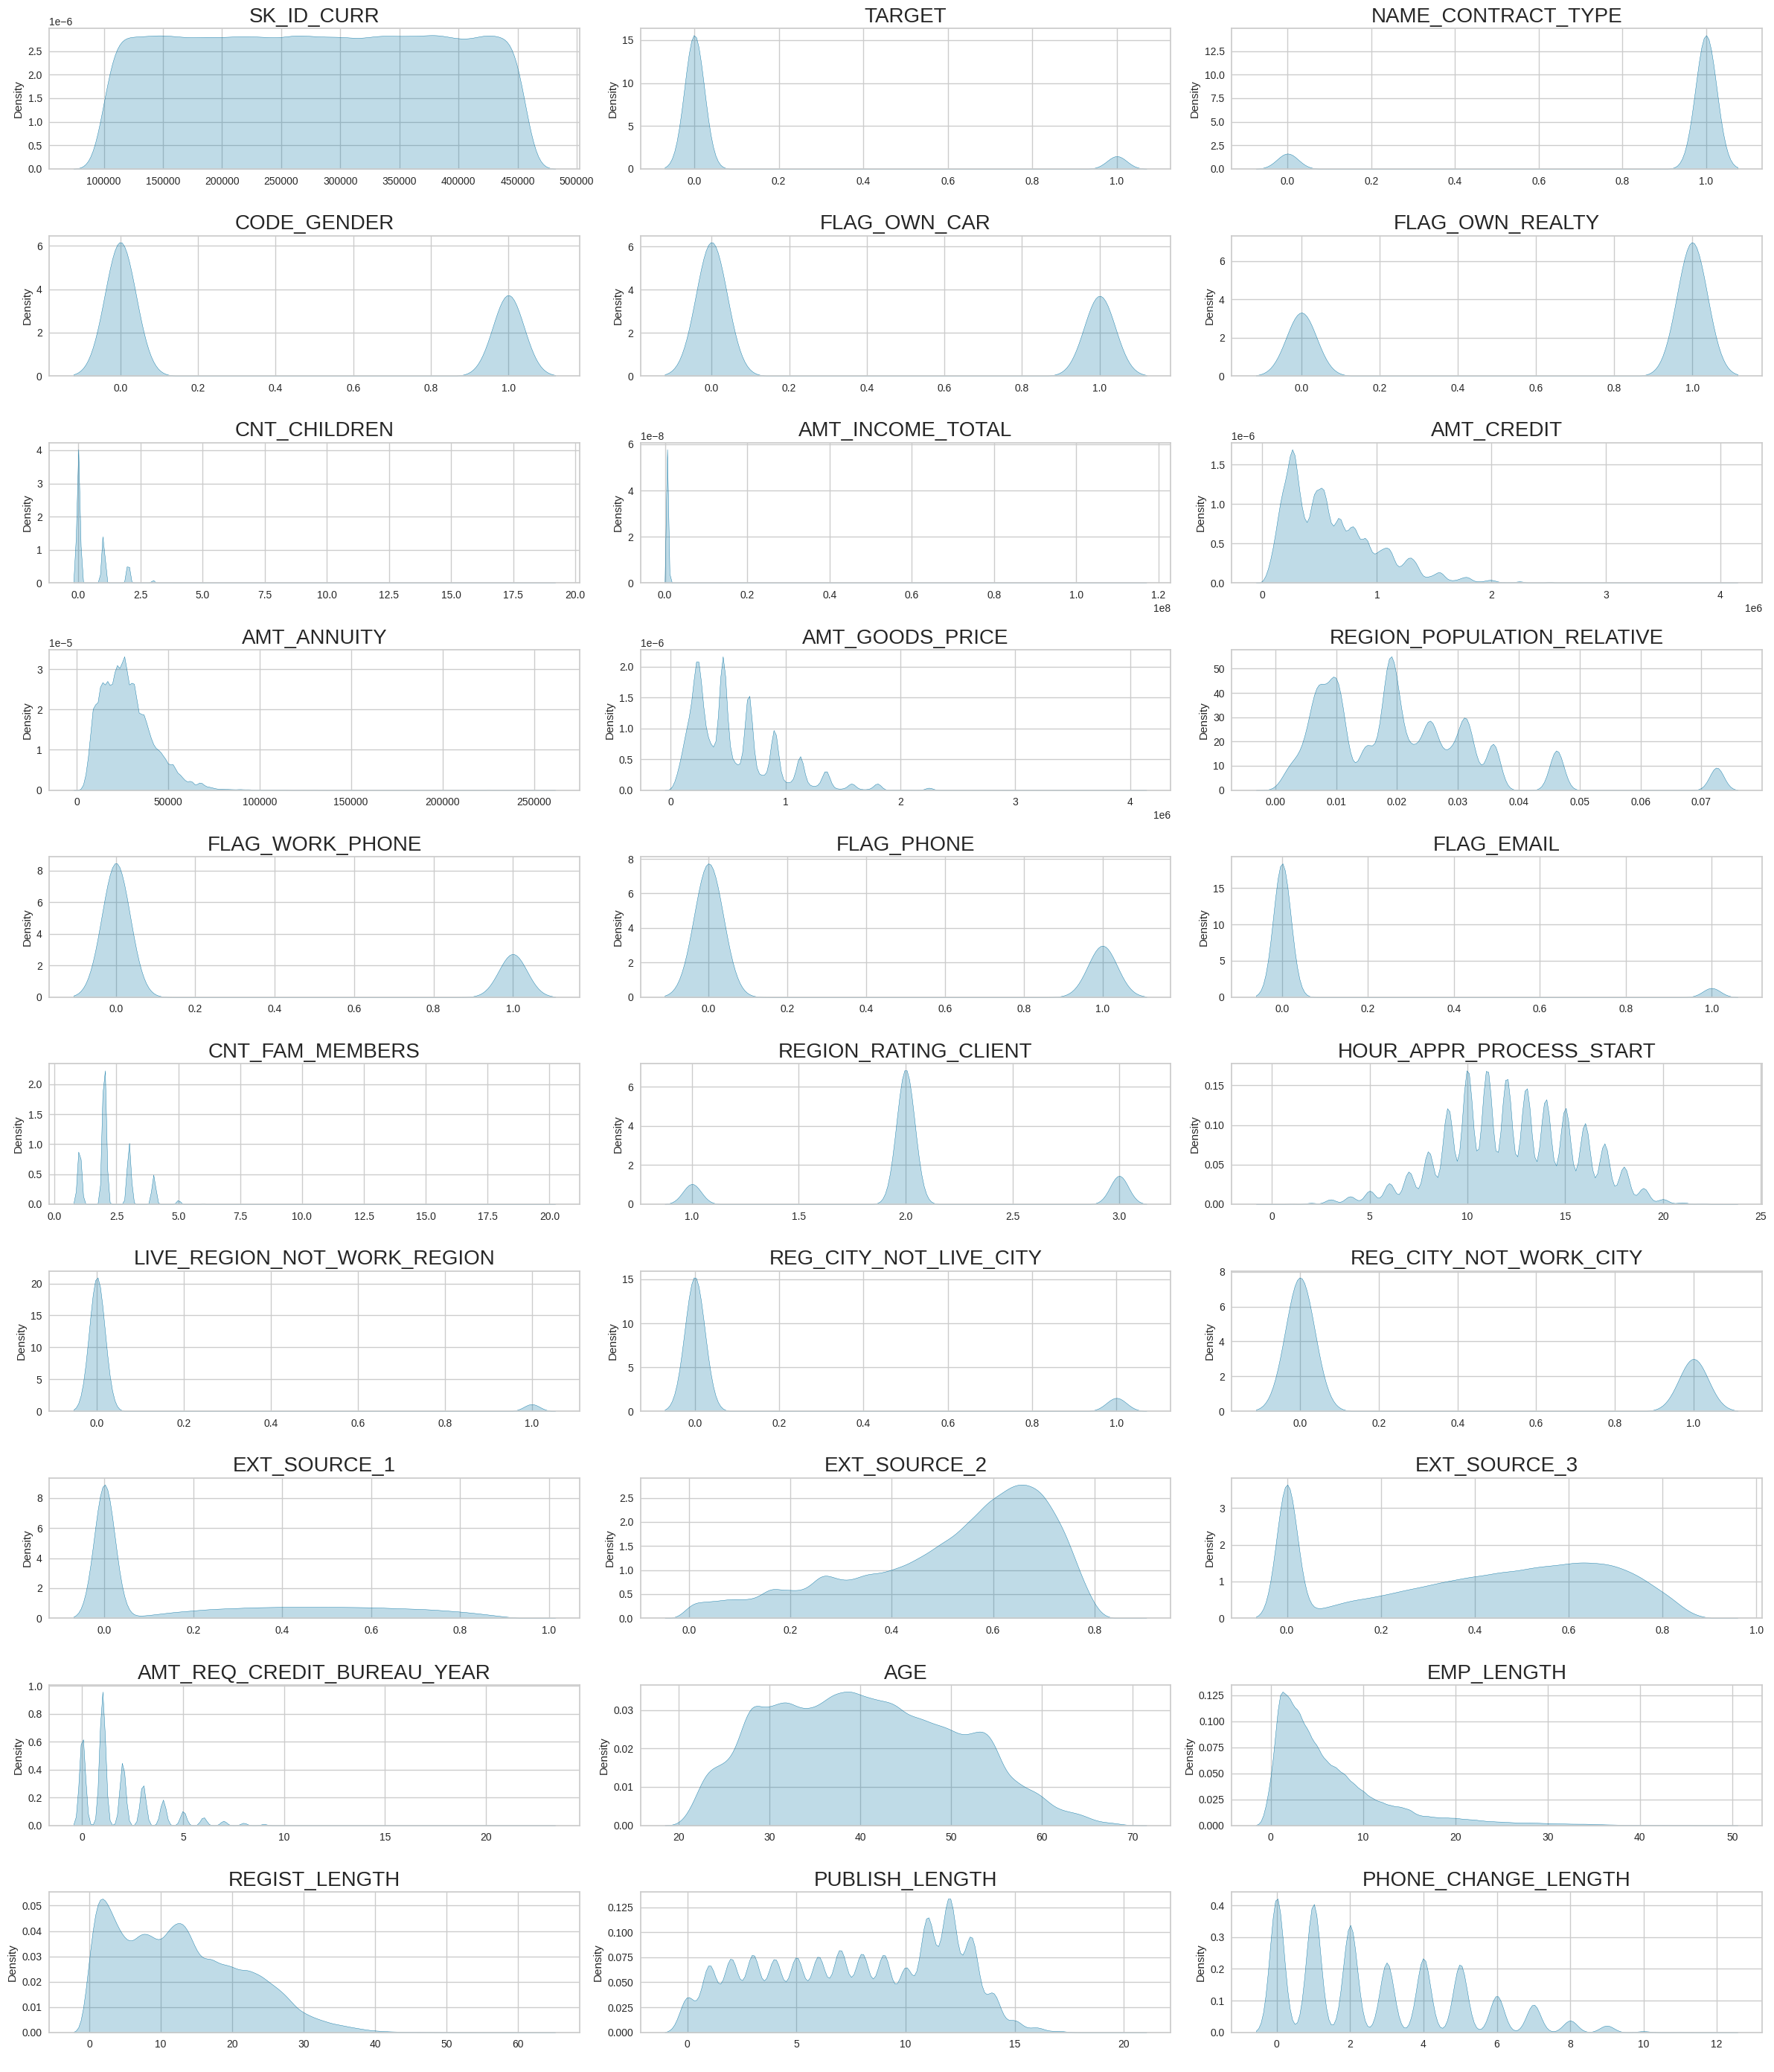

In [ ]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,3,i+1)
    sns.kdeplot(x=df_preprocessing[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

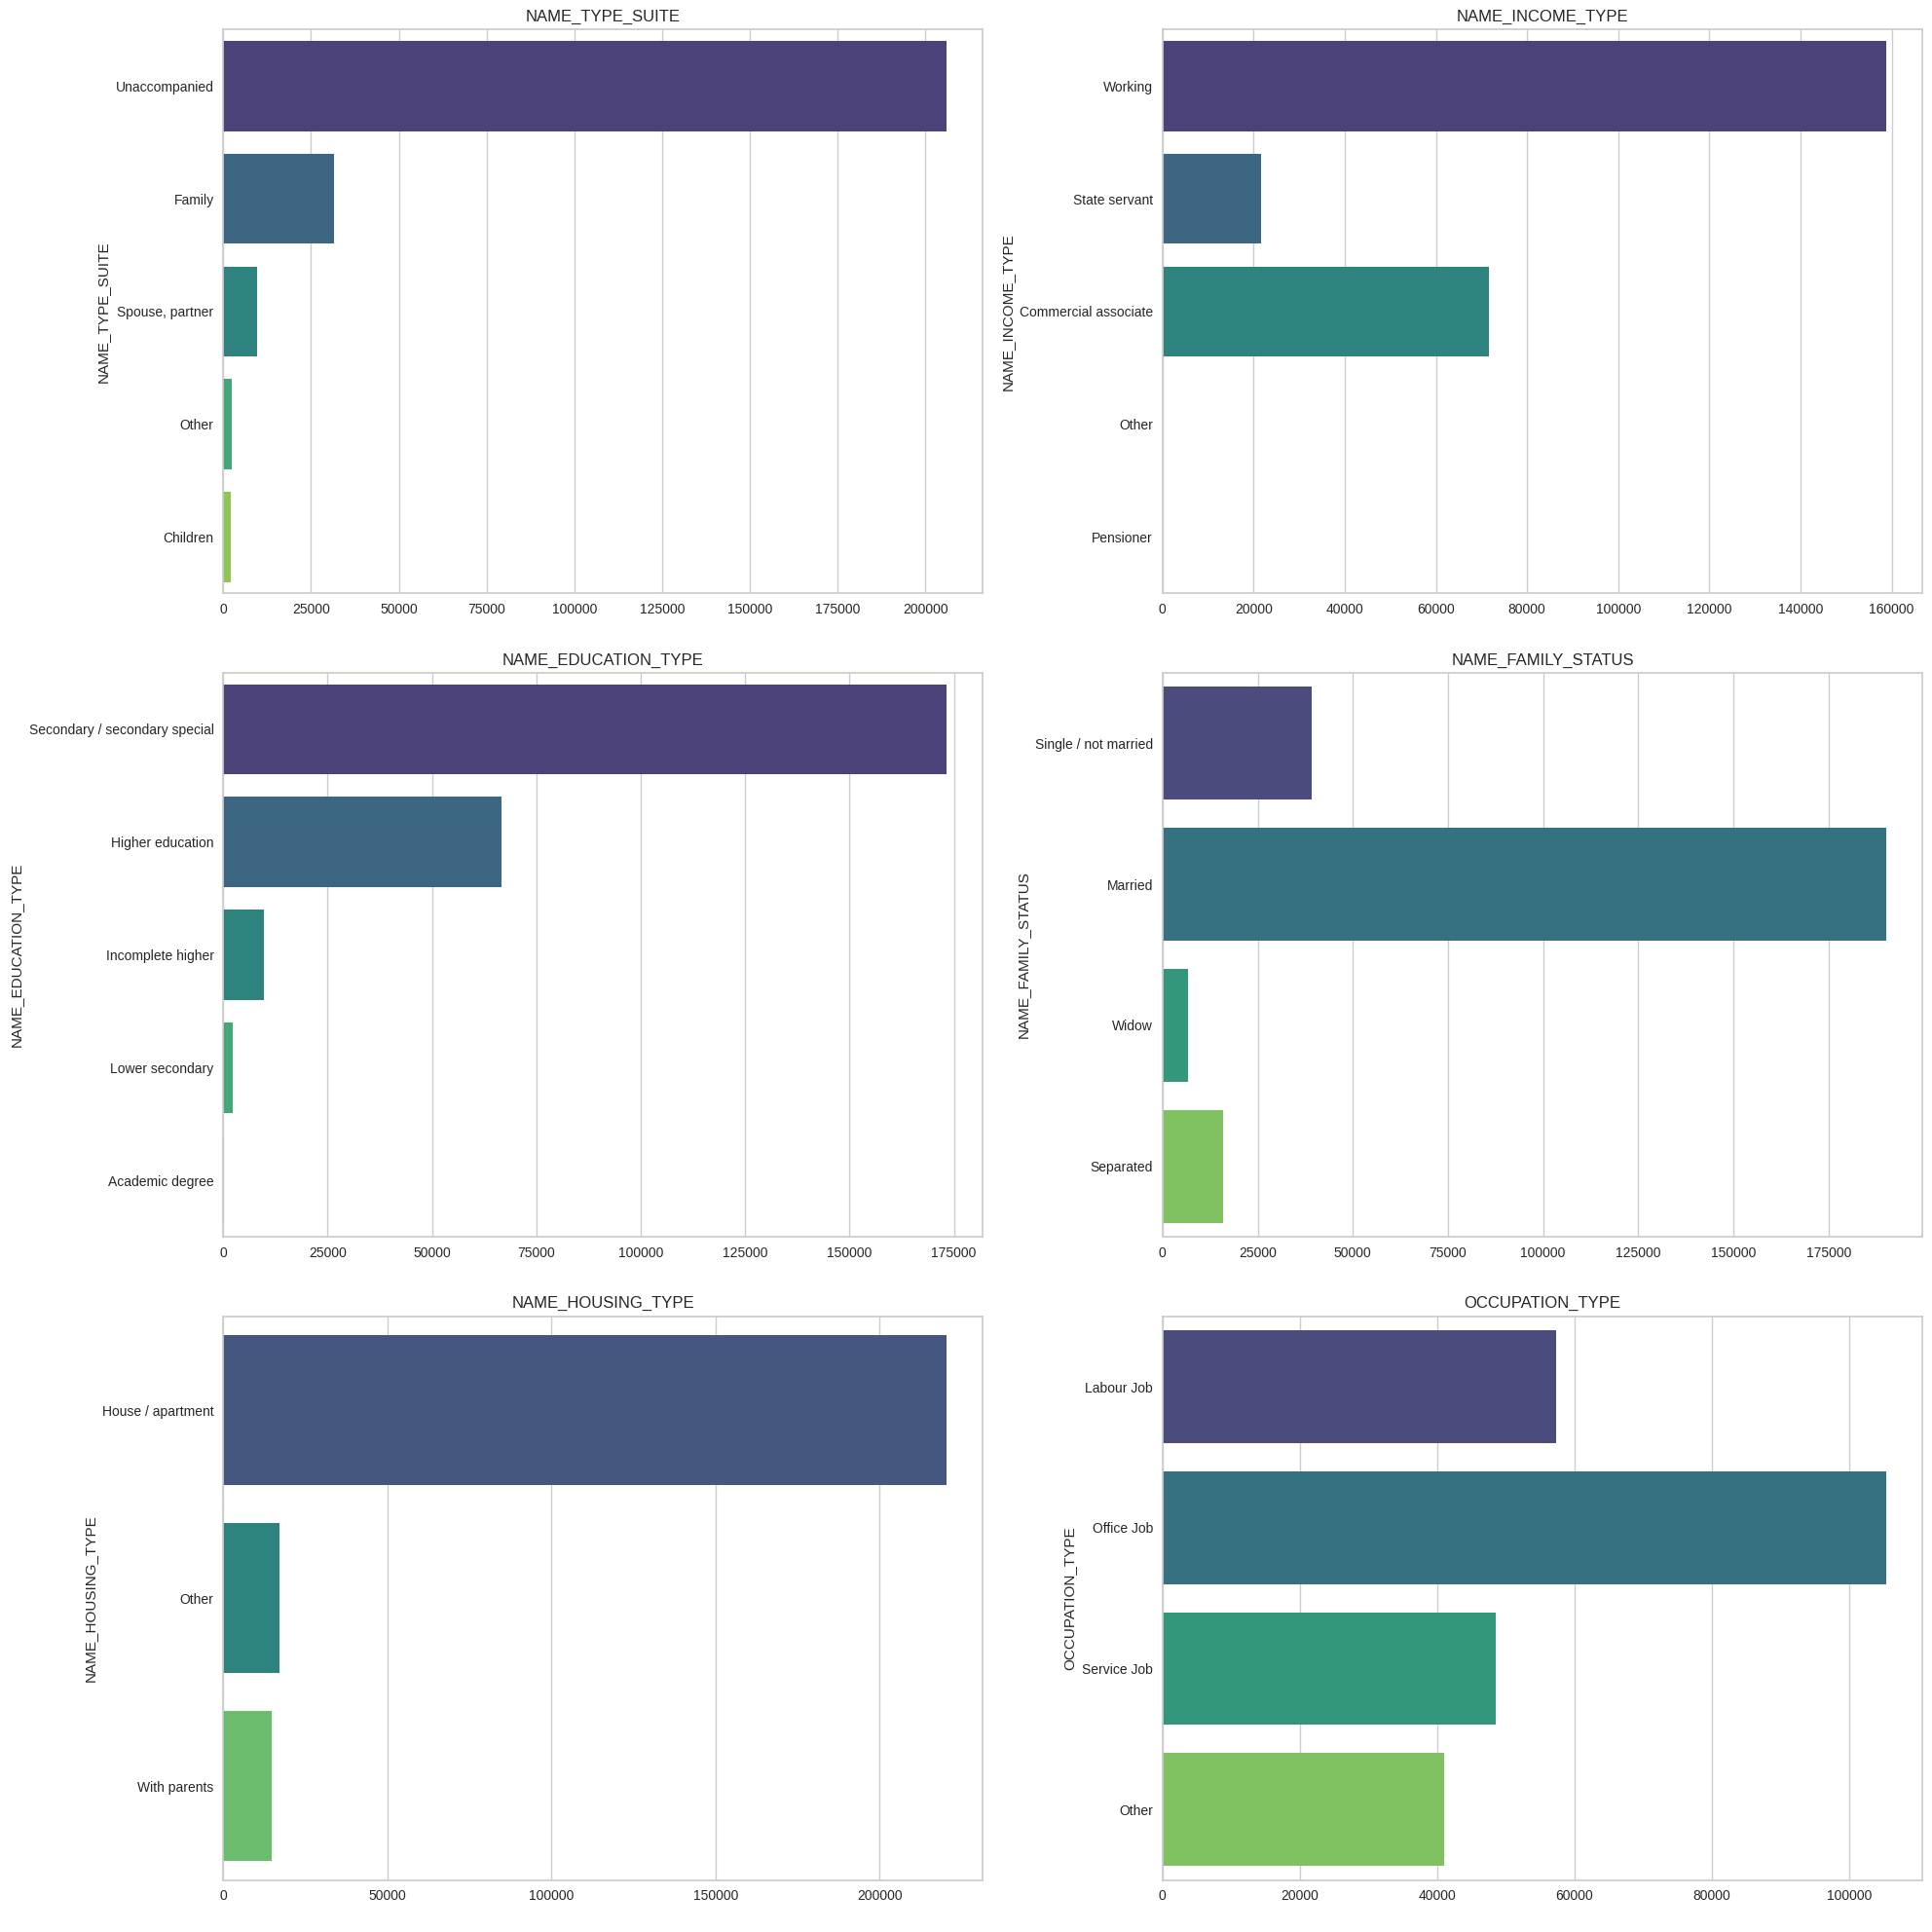

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis After Processing

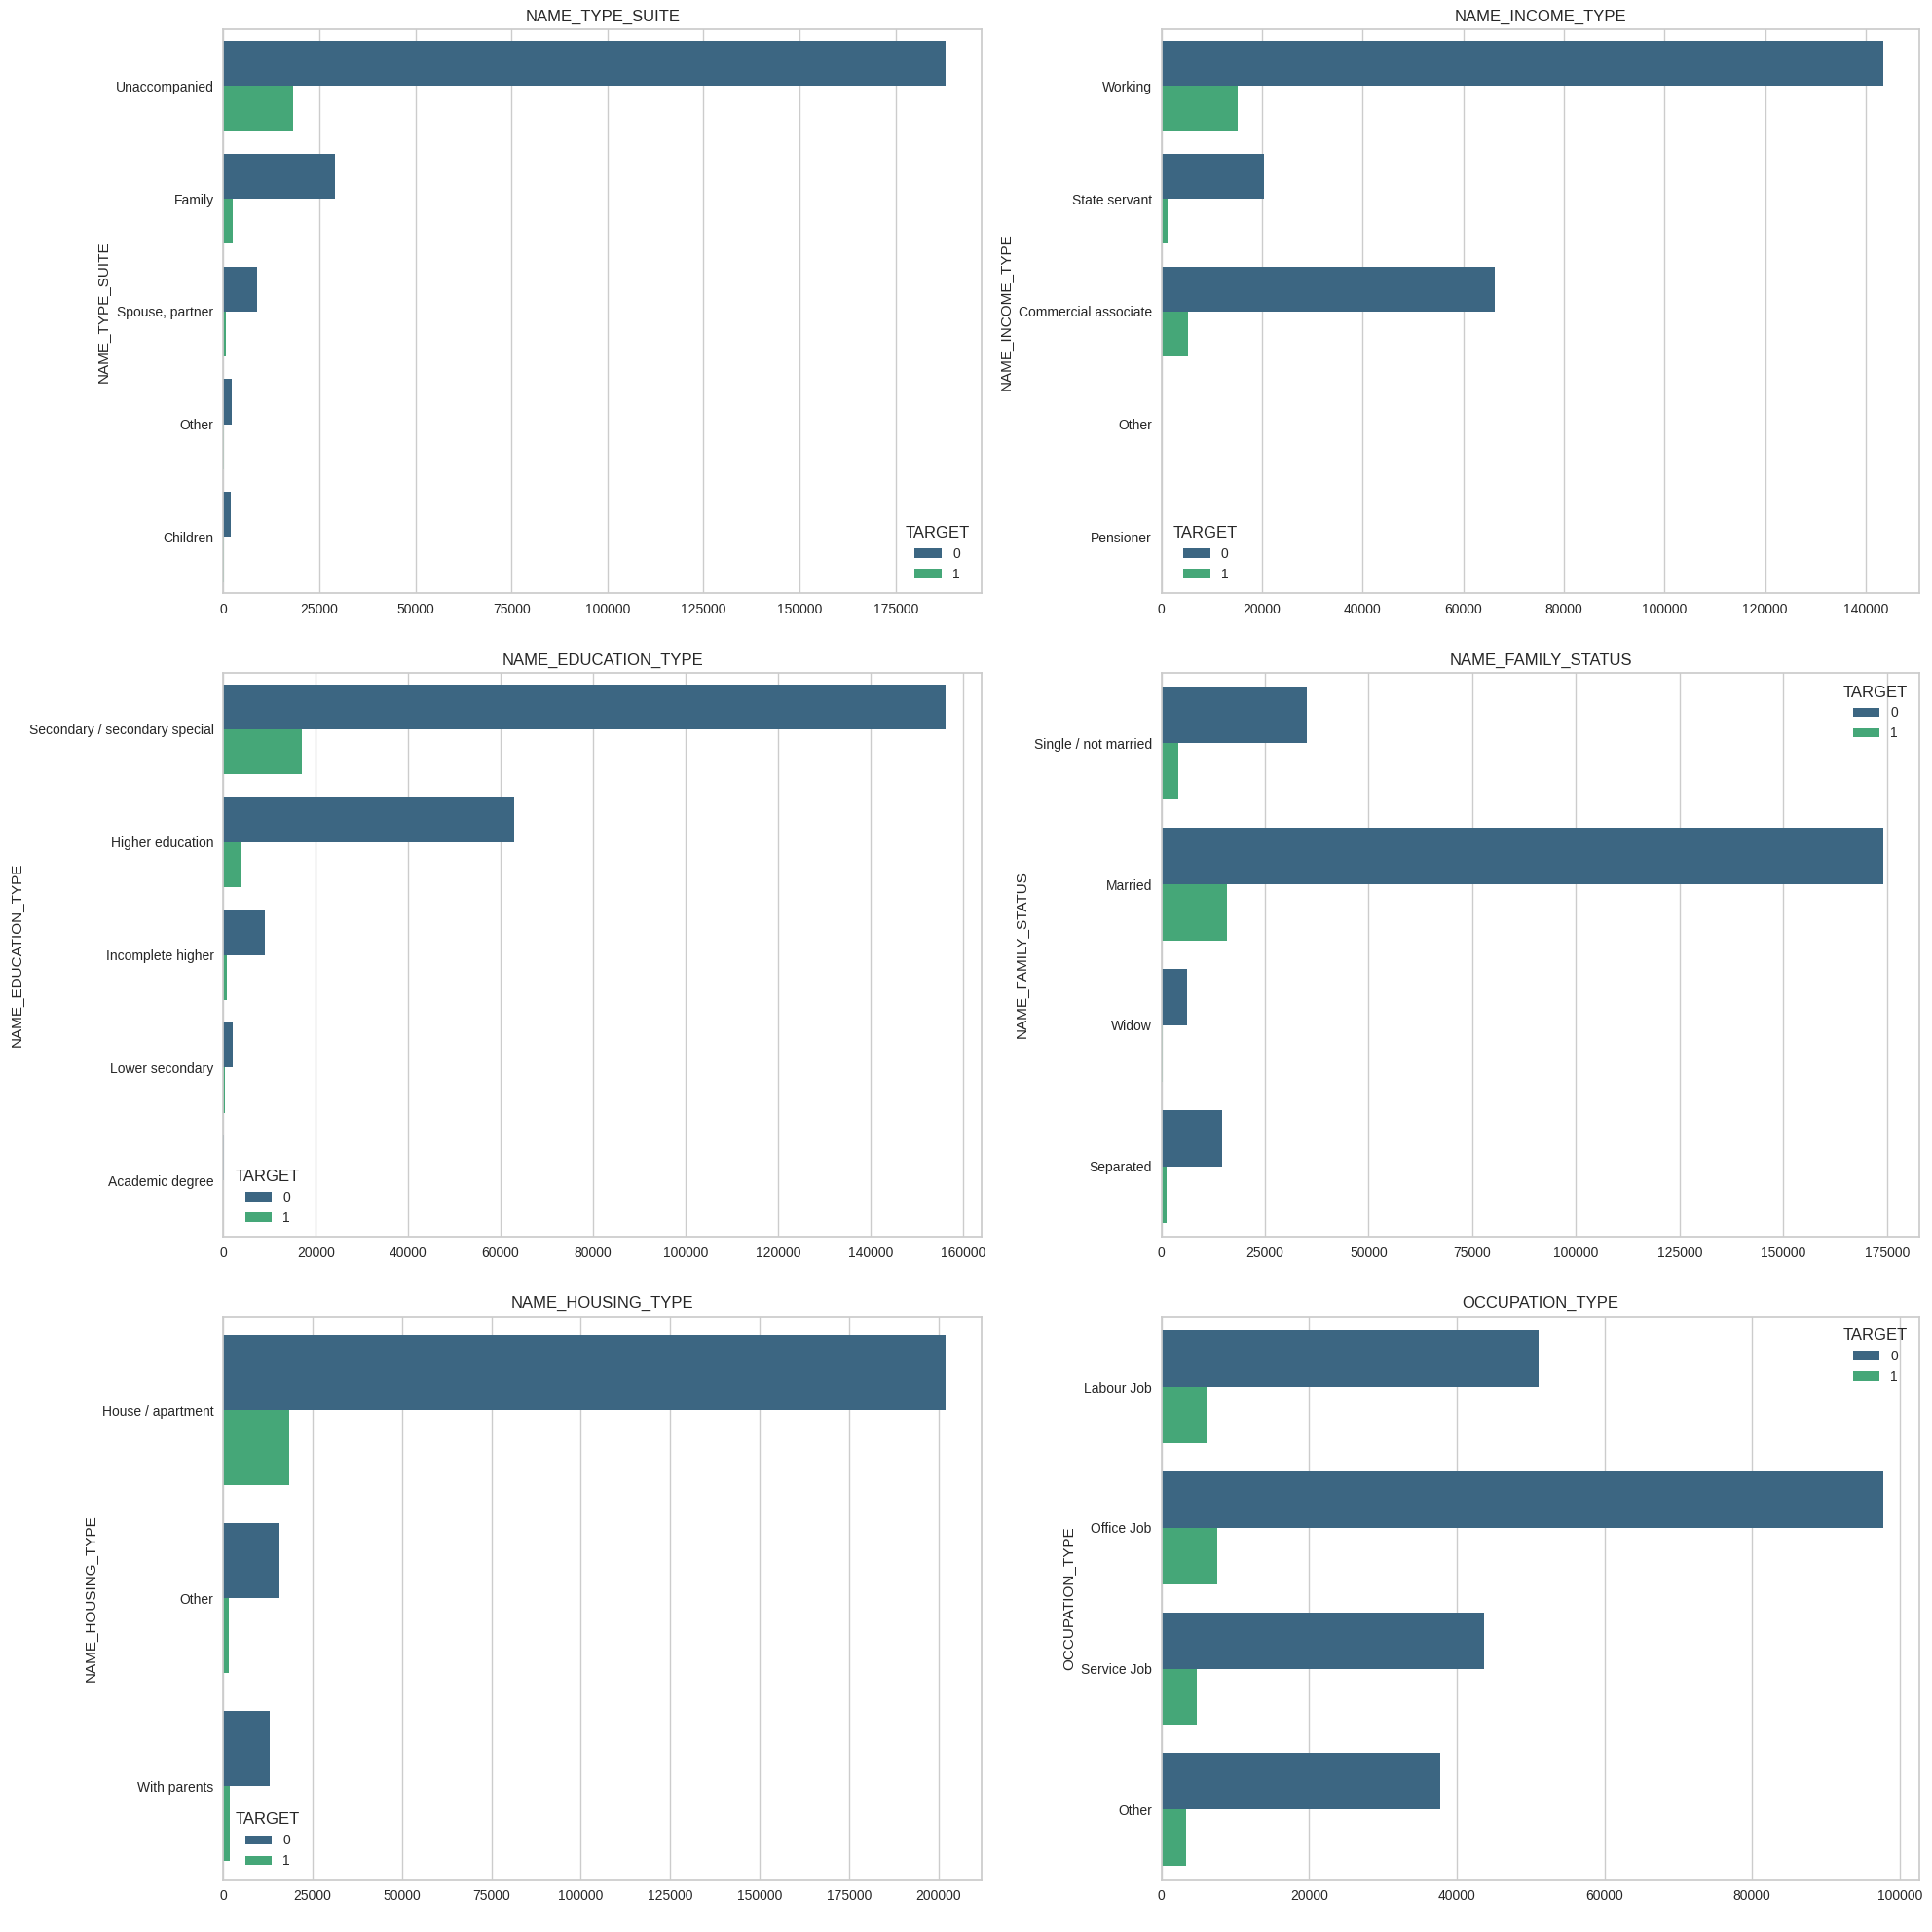

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], palette='viridis', hue=df_eda['TARGET'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

In [ ]:
df_preprocessing.to_csv("df_preprocessing.csv")